# **Step 1: Gathering dataset**



In [15]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr


In [16]:
data=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
gender_dict = data["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

<Axes: title={'center': 'Count of different gender'}>

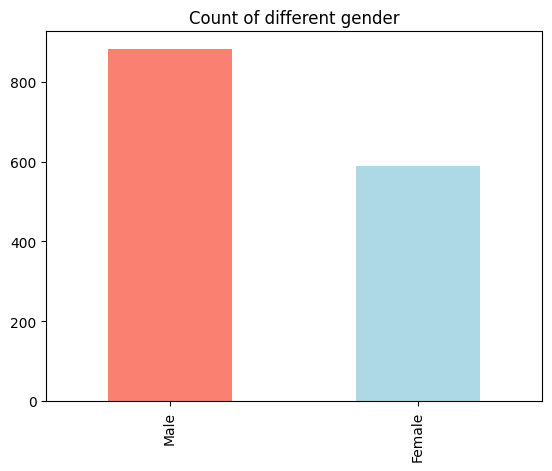

In [20]:
data['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

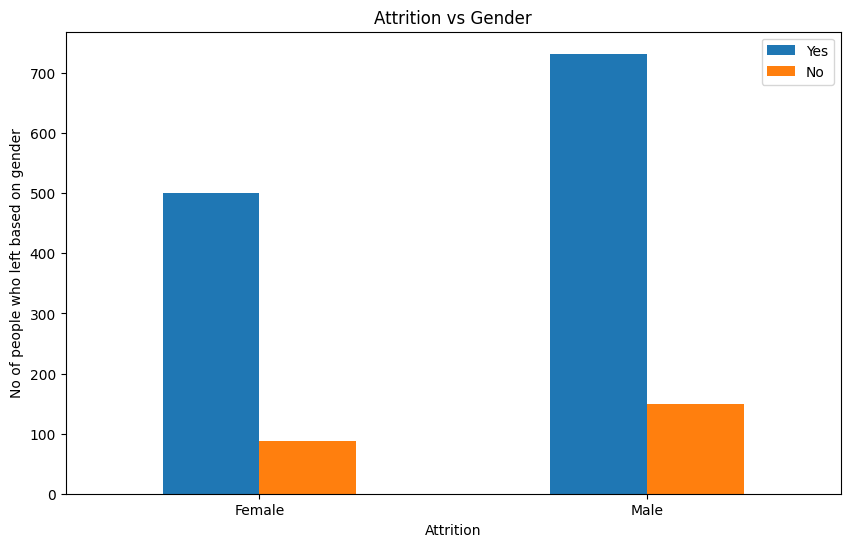

In [21]:
# To figure out that how gender could be the reason for employees to leave the company or to stay in.

#Create a plot for crosstab

pd.crosstab(data['Gender'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

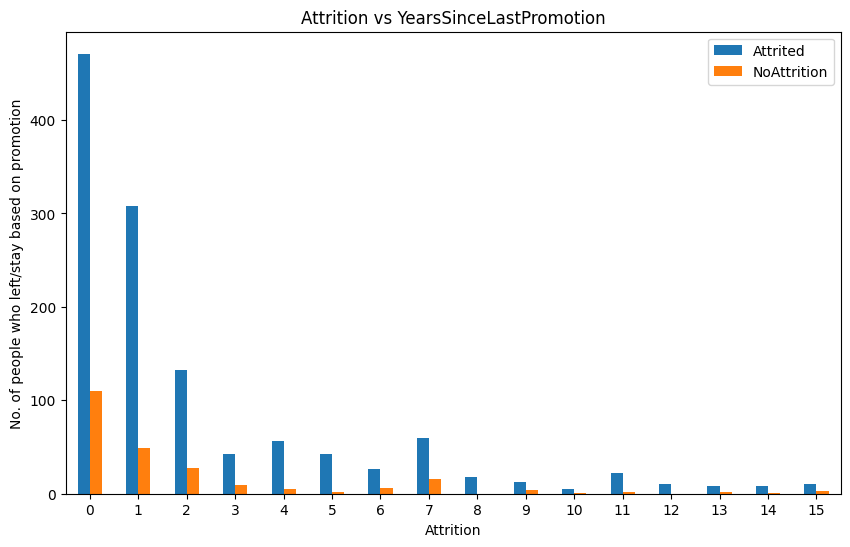

In [22]:
#To figure out that how promotion could be the reason for employees to leave the company or to stay in.

#Create a plot for crosstab

pd.crosstab(data['YearsSinceLastPromotion'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs YearsSinceLastPromotion")
plt.xlabel("Attrition")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Attrited","NoAttrition"])
plt.xticks(rotation=0)


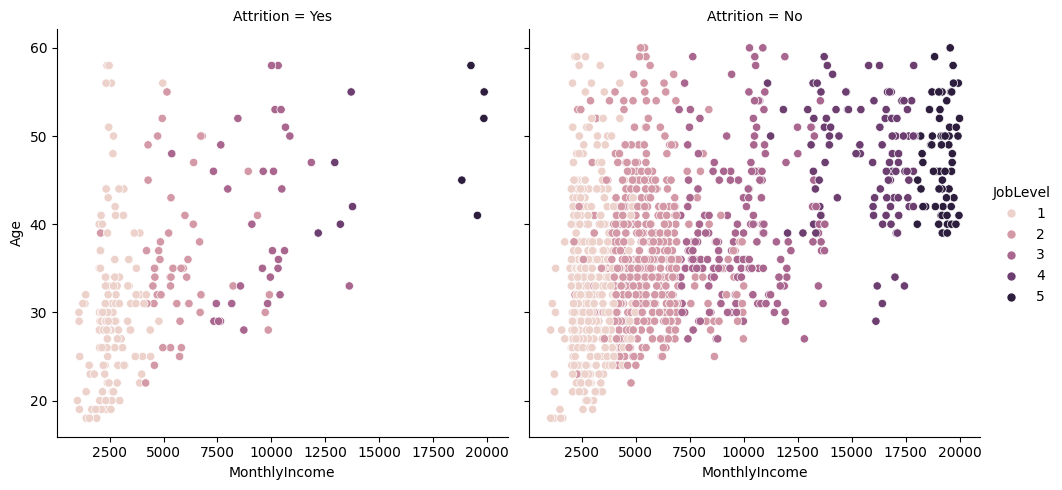

In [23]:
#snr.relplot(x='YearsAtCompany',y='YearsInCurrentRole',hue='Attrition',data=data)
snr.relplot(x='MonthlyIncome',y='Age',hue='JobLevel',col='Attrition',data=data)

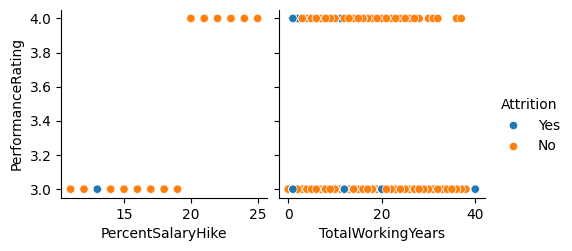

In [24]:
snr.pairplot(data,x_vars=['PercentSalaryHike','TotalWorkingYears'],y_vars=['PerformanceRating'],hue='Attrition')

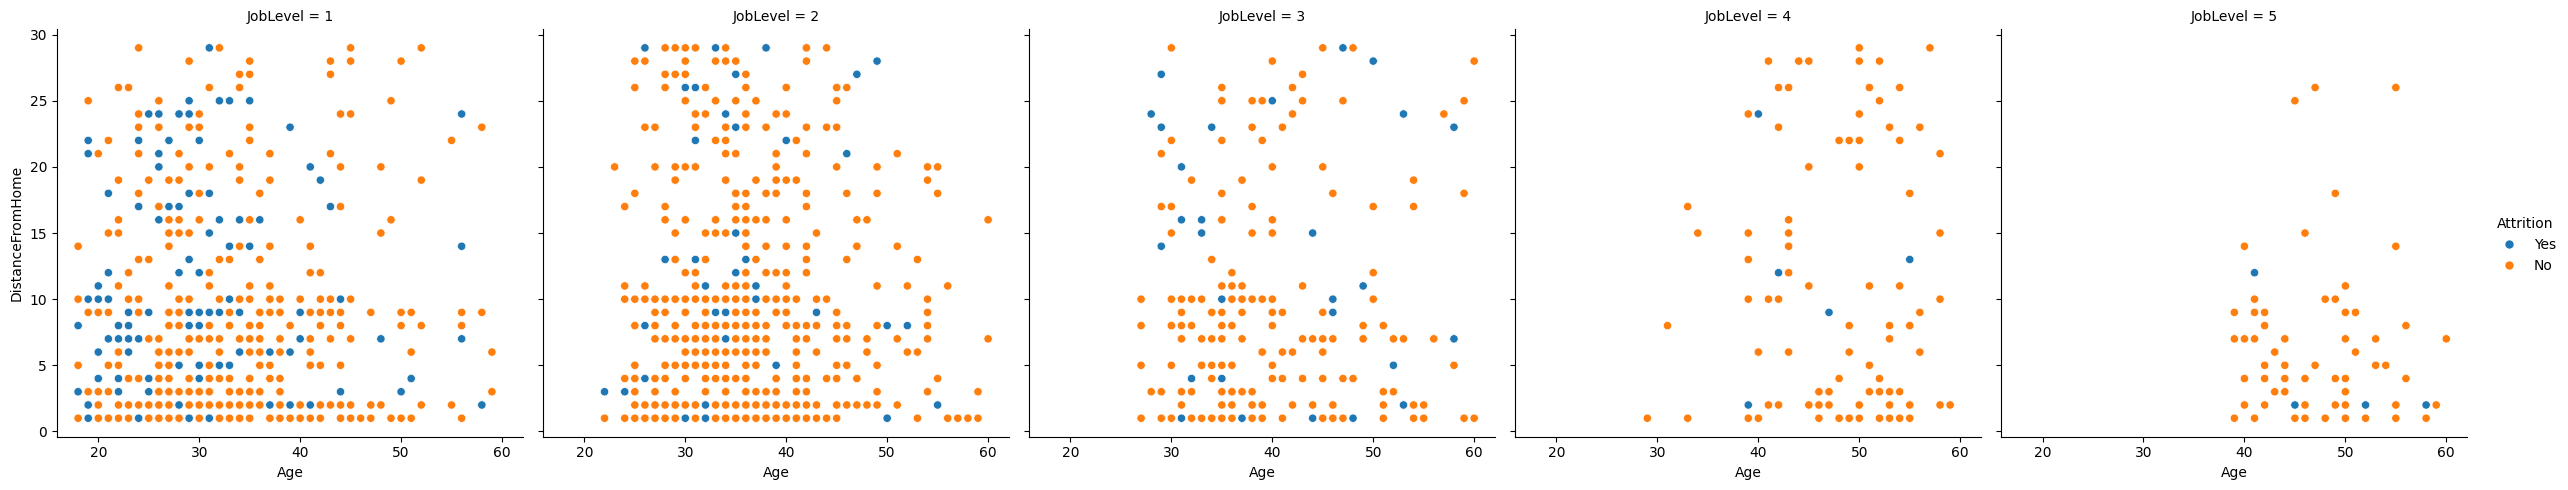

In [25]:
snr.relplot(x='Age',y='DistanceFromHome',col='JobLevel',hue='Attrition',data=data)

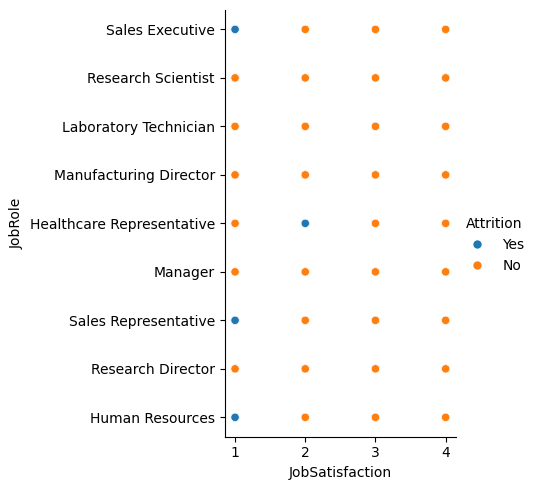

In [26]:
snr.relplot(x='JobSatisfaction', y='JobRole',hue='Attrition',data=data)


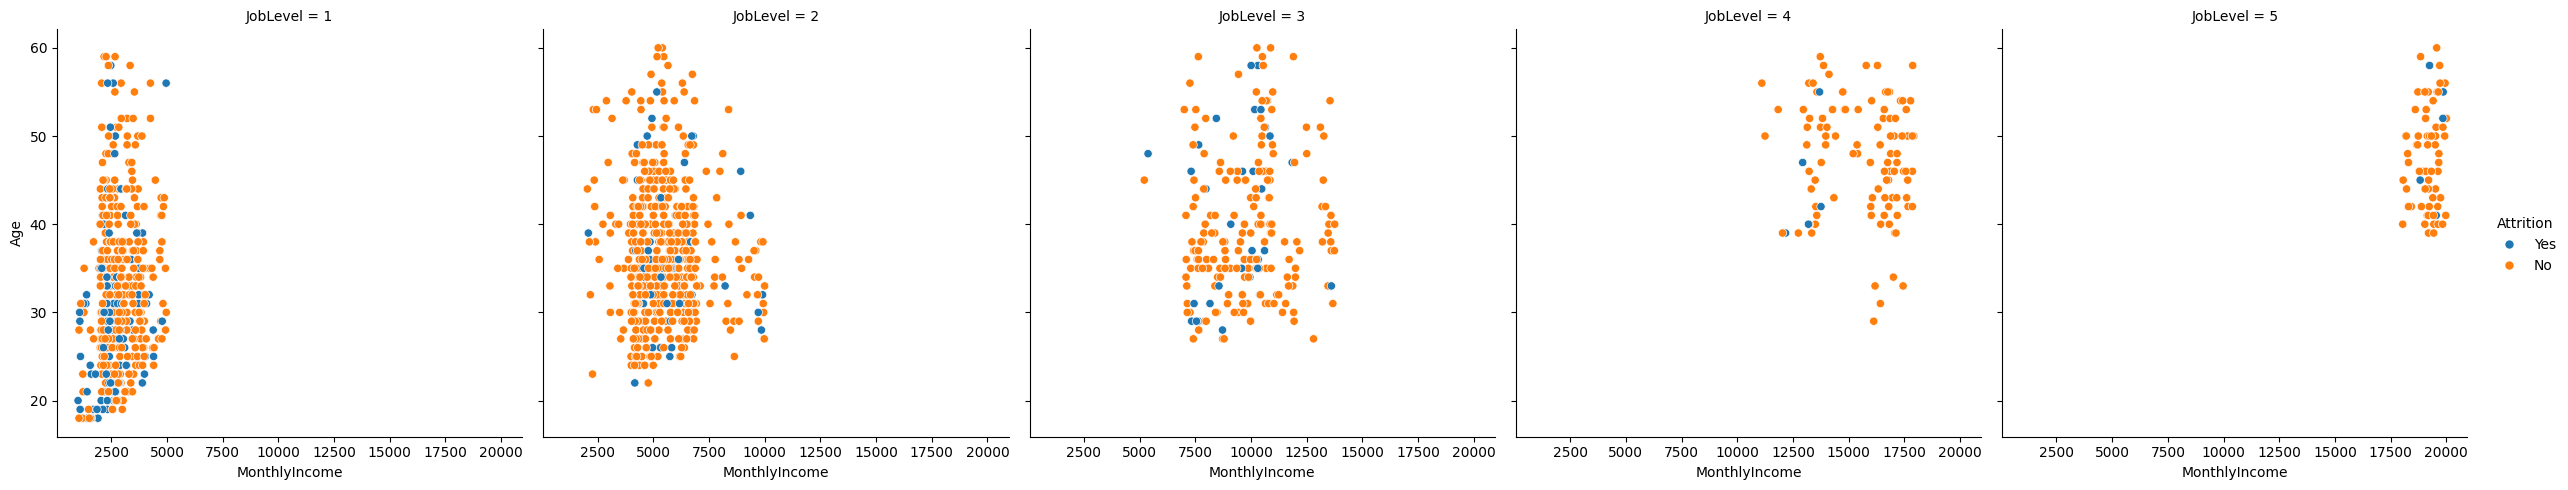

In [27]:
snr.relplot(x='MonthlyIncome', y='Age',hue='Attrition',col='JobLevel',data=data)

<Axes: xlabel='YearsAtCompany', ylabel='MonthlyRate'>

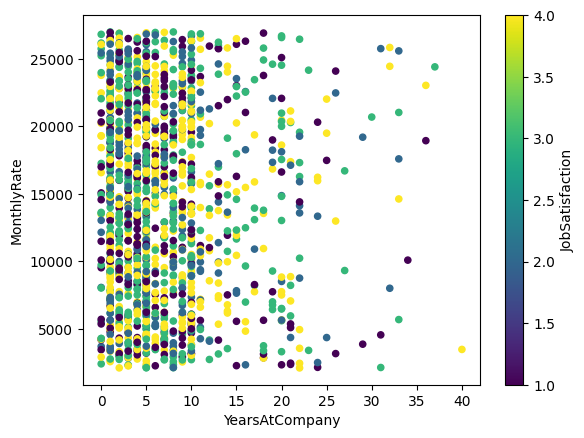

In [28]:
data.plot.scatter(x='YearsAtCompany',y='MonthlyRate',c='JobSatisfaction',colormap='viridis')

<ipython-input-29-59d65f97714b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  snr.heatmap(data.iloc[0:5,0:32].corr(),annot=True)


<Axes: >

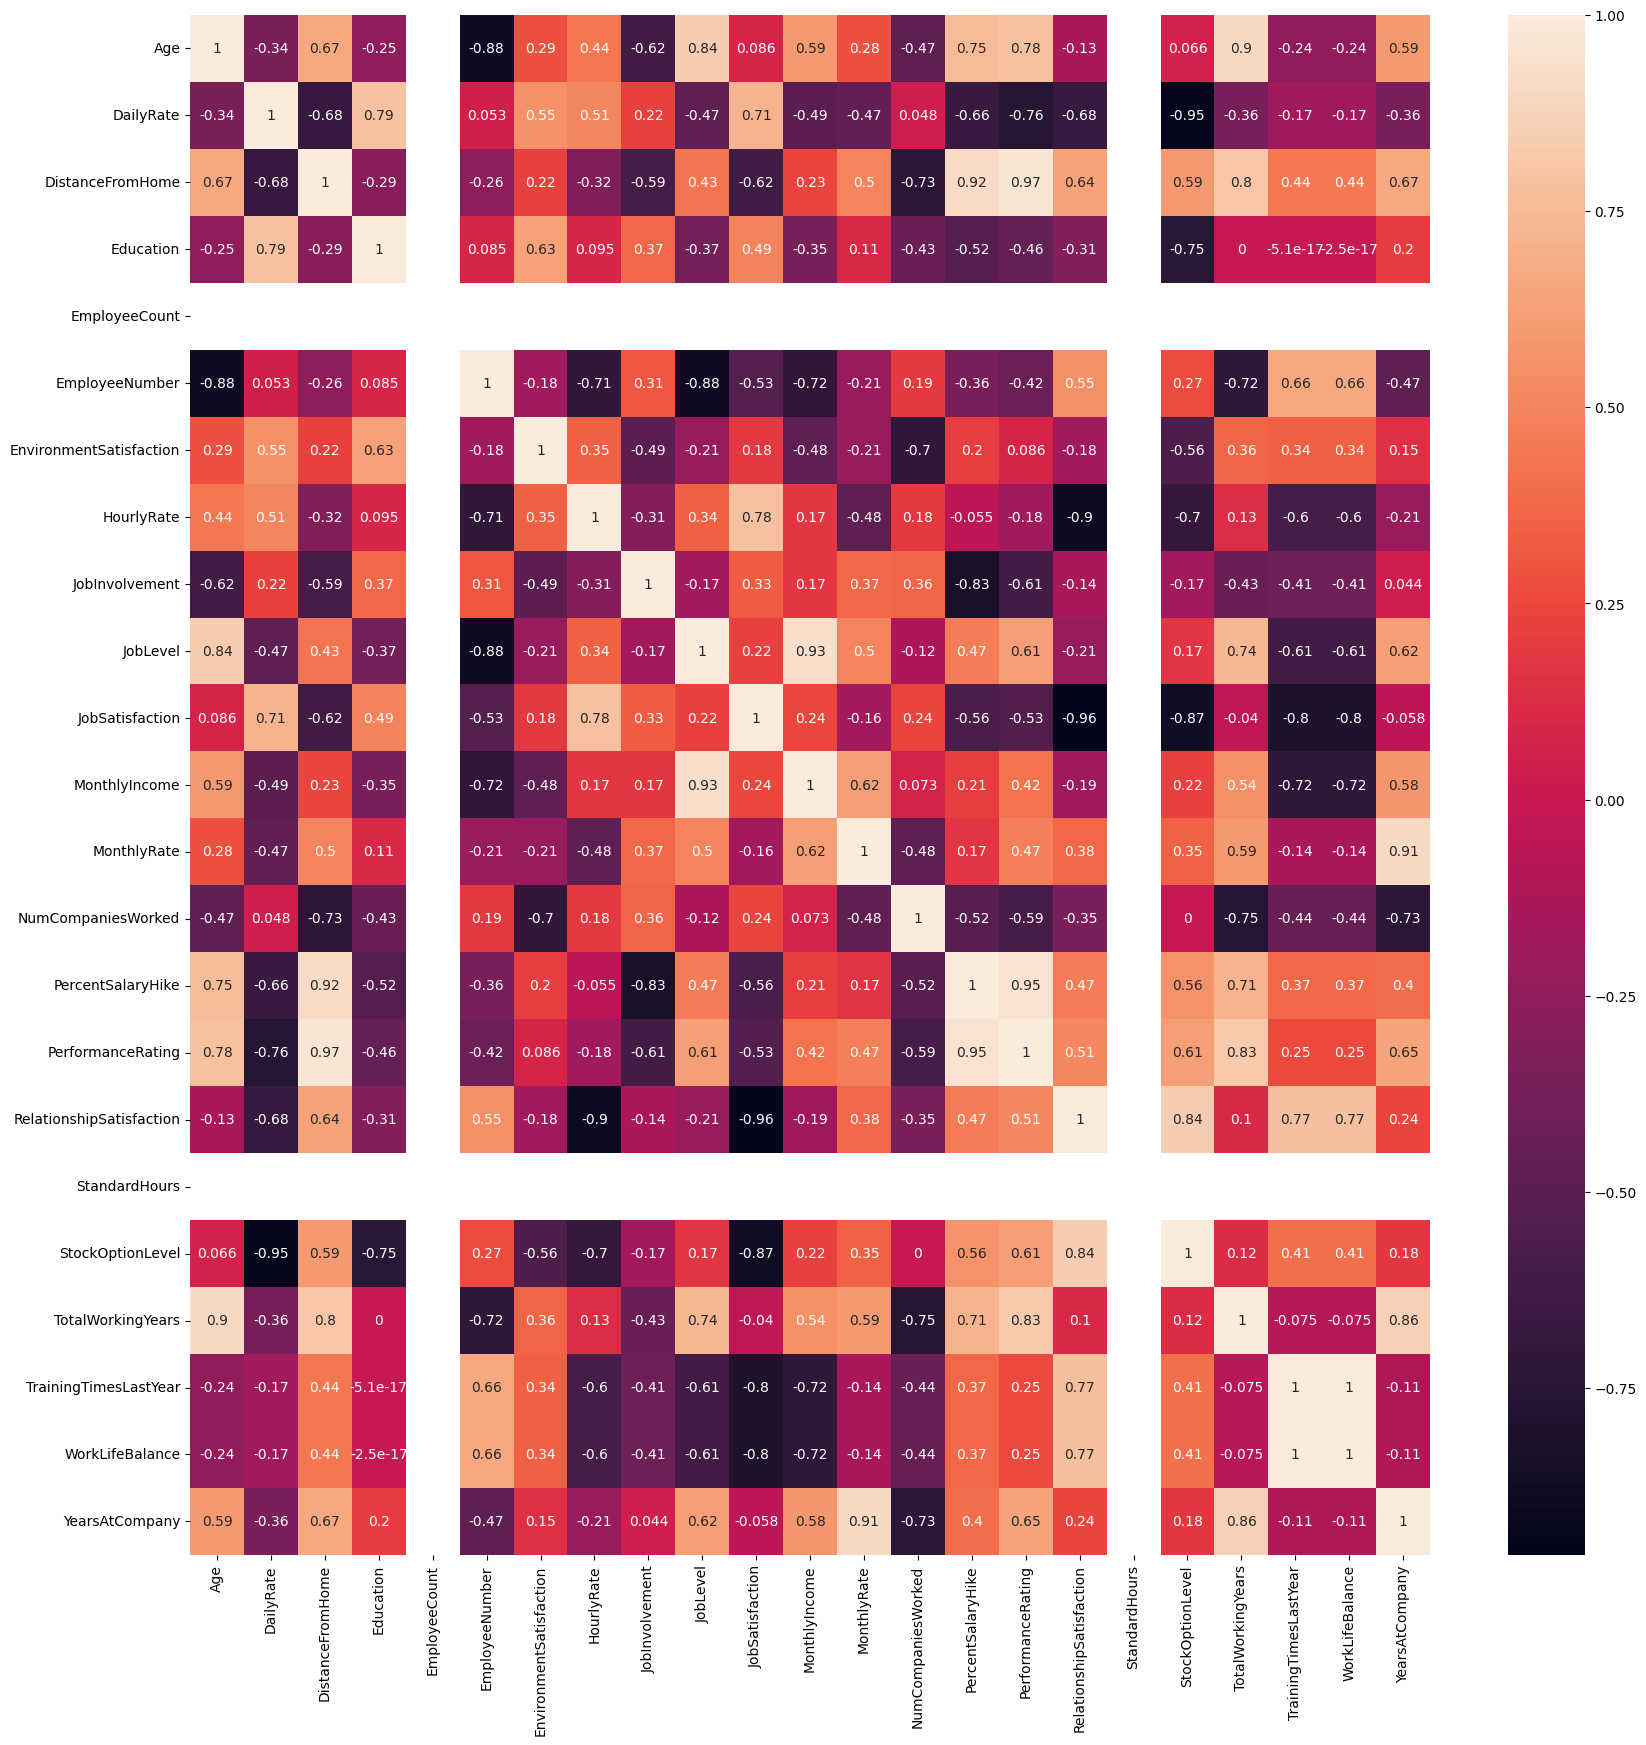

In [29]:
plt.figure(figsize=(20,20))
snr.heatmap(data.iloc[0:5,0:32].corr(),annot=True)

<Axes: >

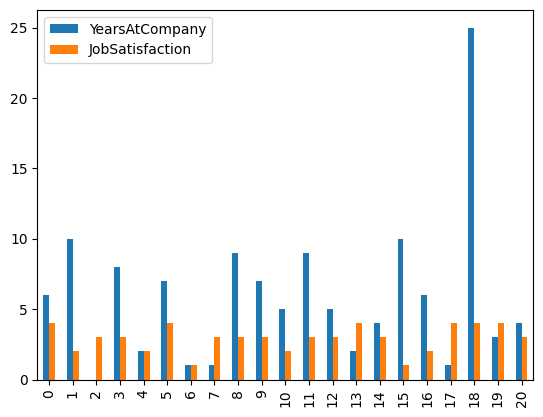

In [30]:
df=data[['YearsAtCompany','JobSatisfaction']]
df.iloc[0:21].plot(kind='bar')

In [31]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

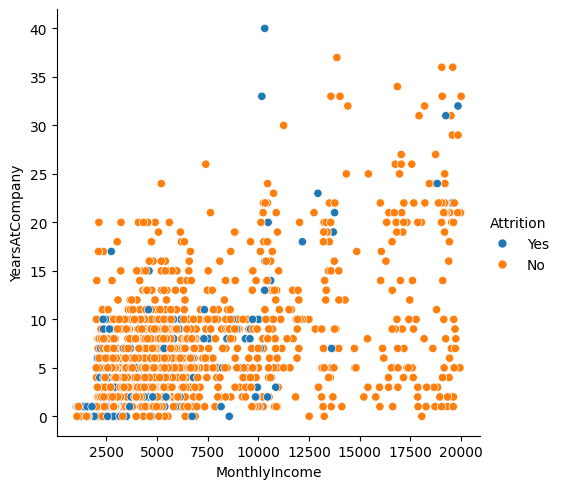

In [32]:
snr.relplot(y='YearsAtCompany',x='MonthlyIncome',hue='Attrition',data=data)

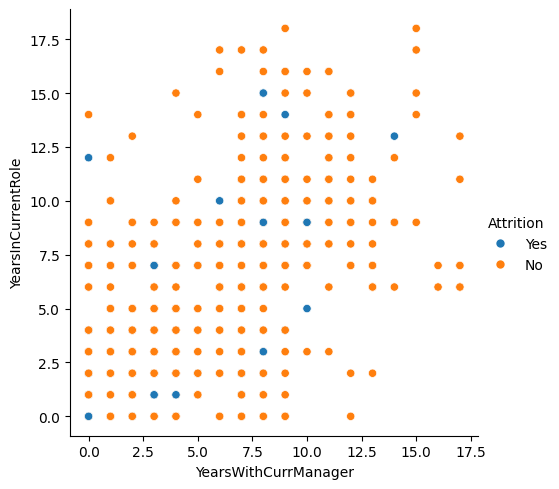

In [33]:
snr.relplot(y='YearsInCurrentRole',x='YearsWithCurrManager',hue='Attrition',data=data)

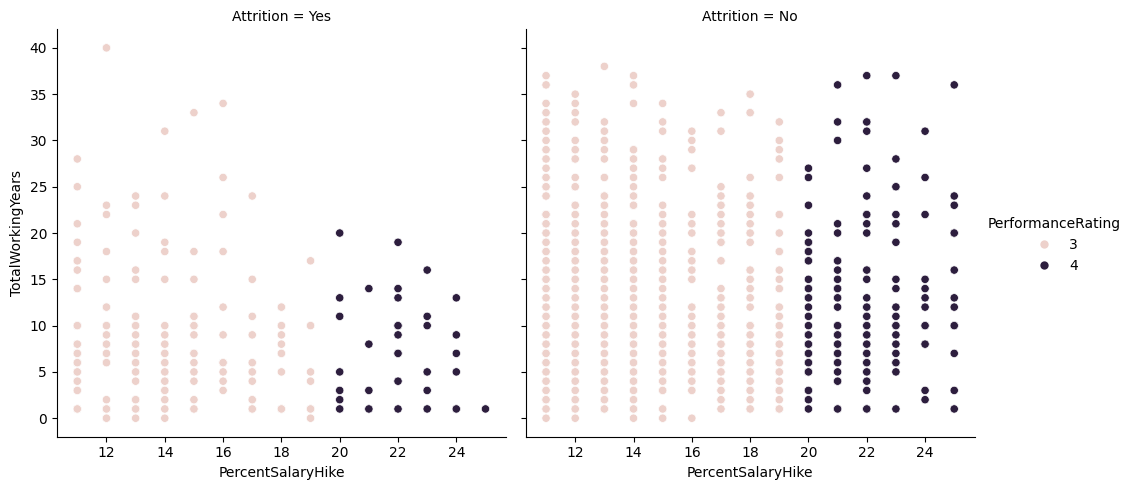

In [34]:
snr.relplot(y='TotalWorkingYears',x='PercentSalaryHike',hue='PerformanceRating',col='Attrition',data=data)

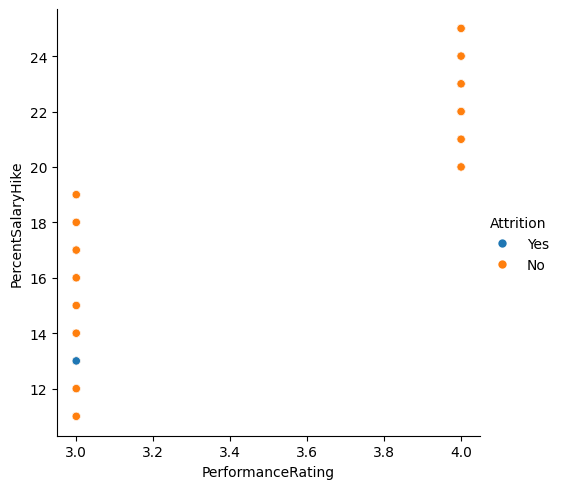

In [35]:
snr.relplot(y='PercentSalaryHike',x='PerformanceRating',hue='Attrition',data=data)

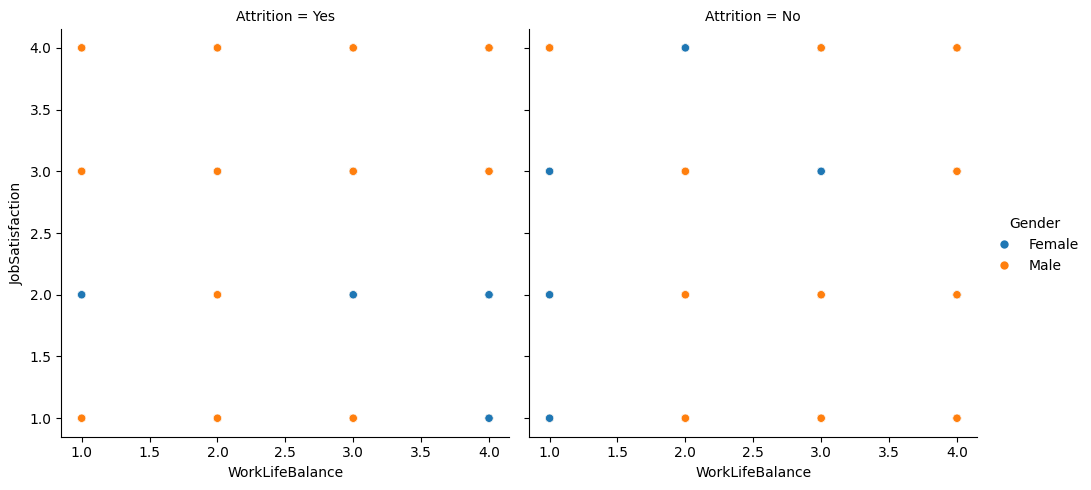

In [36]:
snr.relplot(y='JobSatisfaction',x='WorkLifeBalance',hue='Gender',col='Attrition',data=data)


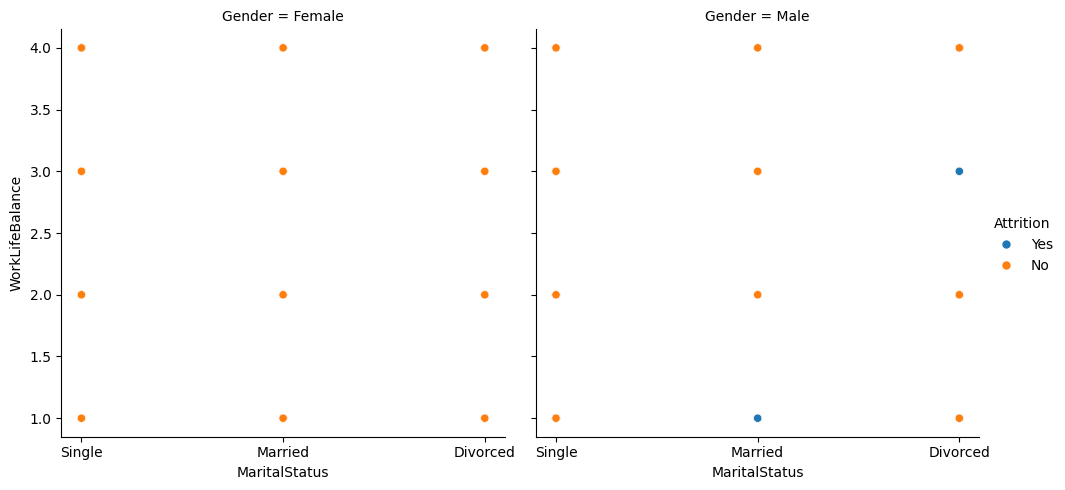

In [37]:
snr.relplot(x='MaritalStatus',y='WorkLifeBalance',hue='Attrition',col='Gender',data=data)

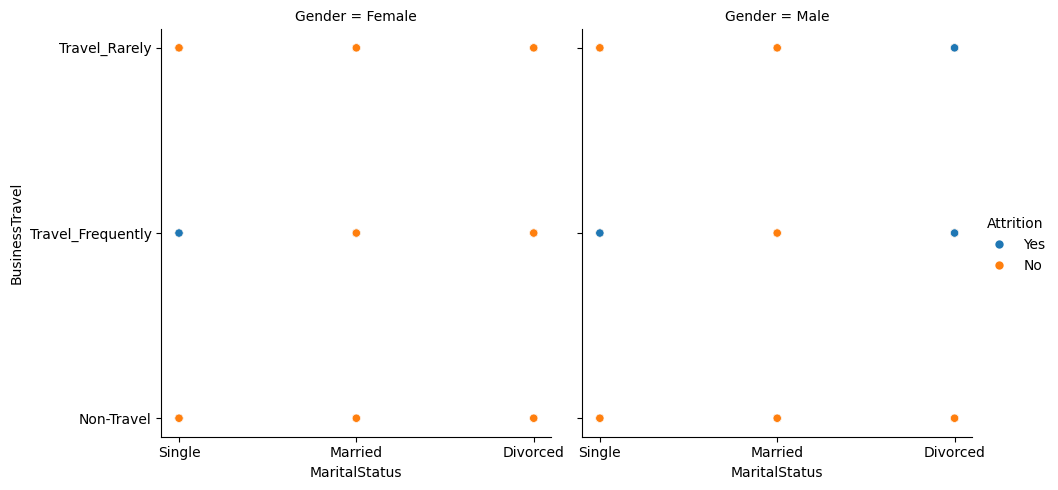

In [38]:
snr.relplot(x='MaritalStatus',y='BusinessTravel',hue='Attrition',col='Gender',data=data)

# ***Deleting some unwanted Attributes from Dataset***

In [39]:
df=data.drop(['JobInvolvement','EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1) #axis=1 will delete the entire column

df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,4,Female,...,3,2,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,4,Male,...,3,2,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,2,Female,...,3,1,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,2,Male,...,3,2,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,...,3,4,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,...,3,1,0,6,3,4,4,3,1,2


In [40]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

# #**Data Cleaning-** ***Categorical Data is present so using One Hot Coding to replace them with numeric values.***

In [41]:
#One Hot coding
#Attrition
#BusinessTravel
#Department
#EducationField
#Gender
#JobRole
#MaritalStatus
#OverTime
df['Attrition']=df['Attrition'].apply({'Yes':1,'No':0}.get)
df['BusinessTravel']=df['BusinessTravel'].apply({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':0}.get)
df['Department']=df['Department'].apply({'Human Resources':1,'Research & Development':2,'Non-Sales':3}.get)
df['EducationField']=df['EducationField'].apply({'Human Resources':1,'Life Sciences':2,'Marketing':3,'Medical':4,'Other':5,'Technical Degree':6}.get)
df['Gender']=df['Gender'].apply({'Male':1,'Female':0}.get)
df['MaritalStatus']=df['MaritalStatus'].apply({'Single':2,'Married':1,'Divorced':0}.get)
df['JobRole']=df['JobRole'].apply({'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Human Resources':7,'Research Director':8,'Sales Representative':9}.get)
df['OverTime']=df['OverTime'].apply({'Yes':1,'No':0}.get)

# ***Was getting valueerror could not convert string to float in these columns, so converting them, By using the to_numeric() function with the errors=‘coerce’ parameter, we convert the column to floats, and non-numeric values are replaced with NaN.***

In [42]:
df['BusinessTravel'] = pd.to_numeric(df['BusinessTravel'], errors='coerce')
df['Department'] = pd.to_numeric(df['Department'],errors='coerce')
df['EducationField'] = pd.to_numeric(df['EducationField'], errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['JobRole'] = pd.to_numeric(df['JobRole'], errors='coerce')
df['MaritalStatus'] = pd.to_numeric(df['MaritalStatus'], errors='coerce')
df['OverTime'] = pd.to_numeric(df['OverTime'], errors='coerce')
df['Attrition'] = pd.to_numeric(df['Attrition'], errors='coerce')

In [43]:
df.dtypes #checking for the Nan values again

Age                           int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole          

# *Was getting Nan value Error, Finding for the Nan values and checking the number of Nan values present *

In [44]:
check_nan = df.isna().values.any()
print(check_nan)


True


In [45]:
count_nan = df.isna().sum()
print(count_nan)

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                  446
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64


# ***Replacing Nan values present in Columns***

In [46]:
df = df.replace([np.nan, -np.inf], 0)


In [47]:
count_nan = df.isna().sum()
print(count_nan)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [48]:
df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole          

In [49]:
check_nan = df.isna().values.any()
print(check_nan)

False


In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Splitting Data into Independent and Dependent Columns**

In [51]:
x=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] #independent column
y=df['Attrition']#dependent column

# **Creating MLM using LogisticRegression Classification**

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75) #means 75% data for training and 20% data for testing


In [53]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [54]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
log_pred=logmodel.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,log_pred)
ac=accuracy_score(y_test,log_pred)

In [57]:
print(cm)

[[315   0]
 [ 49   4]]


In [58]:
print(ac)

0.8668478260869565


In [59]:
#classification of a new employee
my_data={'Age':36, 'BusinessTravel':1, 'DailyRate':1392 , 'Department':3,
       'DistanceFromHome':10, 'Education':2, 'EducationField':6
       , 'EnvironmentSatisfaction':3, 'Gender':1, 'HourlyRate':67,
        'JobLevel':3, 'JobRole':3, 'JobSatisfaction':4,
       'MaritalStatus':0, 'MonthlyIncome':10500, 'MonthlyRate':19876, 'NumCompaniesWorked':3,
        'OverTime':1, 'PercentSalaryHike':15, 'PerformanceRating':3,
       'RelationshipSatisfaction':3, 'StockOptionLevel':1,
       'TotalWorkingYears':9, 'TrainingTimesLastYear':3, 'WorkLifeBalance':4,
       'YearsAtCompany':5, 'YearsInCurrentRole':2, 'YearsSinceLastPromotion':2,
       'YearsWithCurrManager':2}

index=[1]
new_data=pd.DataFrame(my_data,index)

In [60]:
new_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,36,1,1392,3,10,2,6,3,1,67,...,3,3,1,9,3,4,5,2,2,2


In [61]:
#classification of a new employee
classification=logmodel.predict(new_data)
print('The new employee will ',classification,'Attrite')

The new employee will  [0] Attrite


# **Creating MLM using DecisionTree Classification**

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier()

In [63]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred=tree_classifier.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [66]:
print(cm)

[[269  46]
 [ 36  17]]


In [67]:
print(ac)

0.7771739130434783


# **Creating MLM using RandomForest Classification**

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [69]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
classifier_pred=classifier.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,classifier_pred)
ac=accuracy_score(y_test,classifier_pred)

In [72]:
print(cm)

[[313   2]
 [ 45   8]]


In [73]:
print(ac)

0.8722826086956522


# **Creating MLM using KNN Classification**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #k=5

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
knn_pred=knn.predict(x_test)

In [77]:
#checking the accuracy with the help of confusionMatrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,knn_pred)
ac=accuracy_score(y_test,knn_pred)

In [78]:
print(cm)

[[294  21]
 [ 48   5]]


In [79]:
print(ac)

0.8125


In [80]:
print('Accuracy of KNearestNeighbor', accuracy_score(y_test,knn_pred))
print('Accuracy of RandomForest', accuracy_score(y_test,classifier_pred))
print('Accuracy of DecisionTree', accuracy_score(y_test,y_pred))
print('Accuracy of LogisticRegression', accuracy_score(y_test,log_pred))



Accuracy of KNearestNeighbor 0.8125
Accuracy of RandomForest 0.8722826086956522
Accuracy of DecisionTree 0.7771739130434783
Accuracy of LogisticRegression 0.8668478260869565
